## Вступление

Всем привет! На сегодняшнем семинаре мы познакомимся с библиотекой **pytorch**. Он очень похож на numpy, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) -- pytorch может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях. 

#### Семинар построен следующим образом:

1. Вспоминаем numpy и сравниваем операции в pytorch
2. Создаем тензоры в pytorch
3. Работаем с градиентами руками
4. Моя первая нейросеть 

### Вспоминаем numpy и сравниваем операции в pytorch

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [1]:
import numpy as np 
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

from sklearn.datasets import load_boston
from tqdm.notebook import tqdm

%matplotlib inline

In [2]:
a = np.random.rand(5, 3) # создали случайную матрицу 
a

array([[0.12866442, 0.04411275, 0.17304493],
       [0.55855462, 0.40617092, 0.40541496],
       [0.76344873, 0.64214861, 0.71705083],
       [0.03084151, 0.67725134, 0.73570693],
       [0.297783  , 0.41793629, 0.52745889]])

In [3]:
print("Проверили размеры : %s\n" % (a.shape,))

Проверили размеры : (5, 3)



In [4]:
print("Добавили 5 :\n%s\n" % (a + 5))

Добавили 5 :
[[5.12866442 5.04411275 5.17304493]
 [5.55855462 5.40617092 5.40541496]
 [5.76344873 5.64214861 5.71705083]
 [5.03084151 5.67725134 5.73570693]
 [5.297783   5.41793629 5.52745889]]



In [5]:
print("X*X^T  :\n%s\n" % np.dot(a, a.T))

X*X^T  :
[[0.04844501 0.15993842 0.25063764 0.16115398 0.14802448]
 [0.15993842 0.64131937 0.97795304 0.59057306 0.54992136]
 [0.25063764 0.97795304 1.5093707  0.98598118 0.8739341 ]
 [0.16115398 0.59057306 0.98598118 1.00088526 0.68028716]
 [0.14802448 0.54992136 0.8739341  0.68028716 0.54155834]]



In [6]:
print("Среднее по колонкам :\n%s\n" % (a.mean(axis=-1)))

Среднее по колонкам :
[0.11527403 0.4567135  0.70754939 0.48126659 0.41439273]



In [7]:
print("Изменили размеры :\n%s\n" % (a.reshape(3, 5).shape,))

Изменили размеры :
(3, 5)



## Разминка на numpy

При помощи numpy посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [3]:
np.square(np.arange(1, 10_000+1)).sum()

333383335000

Аналогичные операции в **pytorch** выглядят следующим образом, синтаксис отличается, но совсем немного:

In [8]:
x = torch.rand(5, 3)
x

tensor([[0.9315, 0.7050, 0.2447],
        [0.2983, 0.0598, 0.8252],
        [0.7812, 0.2452, 0.4749],
        [0.2218, 0.0399, 0.5757],
        [0.9104, 0.8089, 0.8485]])

In [9]:
print("Проверили размеры : %s\n" % (x.shape,))

Проверили размеры : torch.Size([5, 3])



In [10]:
print("Добавили 5 :\n%s\n" % (x + 5))

Добавили 5 :
tensor([[5.9315, 5.7050, 5.2447],
        [5.2983, 5.0598, 5.8252],
        [5.7812, 5.2452, 5.4749],
        [5.2218, 5.0399, 5.5757],
        [5.9104, 5.8089, 5.8485]])



In [11]:
print("X*X^T  (1):\n%s\n" % (torch.matmul(x, x.transpose(1, 0))))
print("X*X^T  (2):\n%s\n" % (x.mm(x.t())))

X*X^T  (1):
tensor([[1.4244, 0.5220, 1.0167, 0.3757, 1.6259],
        [0.5220, 0.7735, 0.6396, 0.5436, 1.0202],
        [1.0167, 0.6396, 0.8959, 0.4565, 1.3125],
        [0.3757, 0.5436, 0.4565, 0.3822, 0.7228],
        [1.6259, 1.0202, 1.3125, 0.7228, 2.2032]])

X*X^T  (2):
tensor([[1.4244, 0.5220, 1.0167, 0.3757, 1.6259],
        [0.5220, 0.7735, 0.6396, 0.5436, 1.0202],
        [1.0167, 0.6396, 0.8959, 0.4565, 1.3125],
        [0.3757, 0.5436, 0.4565, 0.3822, 0.7228],
        [1.6259, 1.0202, 1.3125, 0.7228, 2.2032]])



In [12]:
print("Среднее по колонкам :\n%s\n" % (x.mean(dim=-1)))

Среднее по колонкам :
tensor([0.6270, 0.3944, 0.5004, 0.2792, 0.8560])



In [13]:
print("Изменили размеры :\n%s\n" % (x.view([3, 5]).shape,))
print("Изменили размеры :\n%s\n" % (x.view_as(x.t()).shape,))

Изменили размеры :
torch.Size([3, 5])

Изменили размеры :
torch.Size([3, 5])



Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype('int64') -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог операции в numpy


## Разминка на PyTorch

При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [7]:
# .item() возвращает число из тензора. 
# Без этого будет тензор размерности 1x1

torch.square(torch.arange(1, 10_000+1)).sum().item()

333383335000

### Создаем тензоры в pytorch и снова изучаем базовые операции

In [14]:
x = torch.empty(5, 3) # пустой тензор
print(x)

tensor([[ 0.0000e+00, -1.0842e-19,  0.0000e+00],
        [-1.0842e-19,  1.1210e-44,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])


In [15]:
x = torch.rand(5, 3) # тензор со случайными числами
print(x)

tensor([[0.5032, 0.3912, 0.4419],
        [0.9690, 0.5528, 0.5068],
        [0.9581, 0.0354, 0.5921],
        [0.9921, 0.0735, 0.2976],
        [0.2869, 0.2174, 0.0927]])


In [16]:
x = torch.zeros(5, 3, dtype=torch.long) # тензор с нулями и указанием типов чисел
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [17]:
x = torch.tensor([5.5, 3]) # конструируем тензор из питоновского листа
print(x)

tensor([5.5000, 3.0000])


In [18]:
x = x.new_ones(5, 3, dtype=torch.double) # используем уже созданный тензор для создания тензора из единичек
print(x, x.size()) 

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64) torch.Size([5, 3])


In [19]:
x = torch.randn_like(x, dtype=torch.float) # создаем матрицу с размерами как у x
print(x, x.size())

tensor([[-0.2427, -1.3336, -0.8556],
        [ 0.2776, -0.8391,  0.1188],
        [ 0.2853, -0.4720, -0.3995],
        [ 0.4966,  0.3070,  0.5181],
        [-0.0944,  1.6337,  0.1788]]) torch.Size([5, 3])


In [20]:
y = torch.rand(5, 3)
print(x + y) # операция сложение

tensor([[ 0.5433, -0.6898, -0.5557],
        [ 1.1377, -0.3119,  0.2719],
        [ 0.6165,  0.4809, -0.3893],
        [ 0.5697,  0.5963,  1.0434],
        [ 0.1743,  2.3303,  0.3773]])


In [21]:
z = torch.add(x, y) # очередная операция сложения
print(z)

tensor([[ 0.5433, -0.6898, -0.5557],
        [ 1.1377, -0.3119,  0.2719],
        [ 0.6165,  0.4809, -0.3893],
        [ 0.5697,  0.5963,  1.0434],
        [ 0.1743,  2.3303,  0.3773]])


In [22]:
torch.add(x, y, out=z) # и наконец последний вид
print(z)

tensor([[ 0.5433, -0.6898, -0.5557],
        [ 1.1377, -0.3119,  0.2719],
        [ 0.6165,  0.4809, -0.3893],
        [ 0.5697,  0.5963,  1.0434],
        [ 0.1743,  2.3303,  0.3773]])


In [23]:
print(x * y) # поэлементное умножение

tensor([[-0.1908, -0.8585, -0.2566],
        [ 0.2388, -0.4424,  0.0182],
        [ 0.0945, -0.4498, -0.0041],
        [ 0.0363,  0.0888,  0.2721],
        [-0.0254,  1.1380,  0.0355]])


In [24]:
print(x @ y.t()) # матричное умножение

tensor([[-1.3059, -1.0430, -1.3600, -0.8530, -1.1640],
        [-0.2864, -0.1855, -0.7065, -0.1601, -0.4863],
        [-0.1994, -0.0646, -0.3594, -0.3256, -0.3314],
        [ 0.7434,  0.6684,  0.4623,  0.3972,  0.4501],
        [ 1.0311,  0.8075,  1.5274,  0.5596,  1.1481]])


In [25]:
print(x.mm(y.t())) # и опять матричное умножение

tensor([[-1.3059, -1.0430, -1.3600, -0.8530, -1.1640],
        [-0.2864, -0.1855, -0.7065, -0.1601, -0.4863],
        [-0.1994, -0.0646, -0.3594, -0.3256, -0.3314],
        [ 0.7434,  0.6684,  0.4623,  0.3972,  0.4501],
        [ 1.0311,  0.8075,  1.5274,  0.5596,  1.1481]])


In [26]:
print(x.unsqueeze(0).shape) # добавили измерение в начало, аналог броадкастинга 

torch.Size([1, 5, 3])


In [27]:
print(x.unsqueeze(0).squeeze(0).shape) # убрали измерение в начале, аналог броадкастинга 

torch.Size([5, 3])


Мы также можем делать обычные срезы и переводить матрицы назад в numpy:

In [28]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
print(np.allclose(x.numpy(), a))
print(np.allclose(x.numpy()[:, 1], a[:, 1]))

True
True


### Работаем с градиентами руками

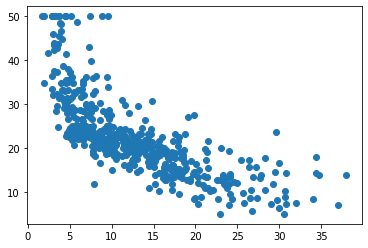

In [29]:
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target)

В pytorch есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

<img src="./example1.png">

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенту для всех тензоров, у которых `requires_grad=True`.

In [30]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

assert w.grad is None # только создали тензоры и в них нет градиентов
assert b.grad is None

In [31]:
y_pred = w * x + b # и опять совершаем операции с тензорами
loss = torch.mean((y_pred - y)**2) # совершаем операции с тензорами
loss.backward() # считаем градиенты

In [32]:
assert w.grad is not None # сделали операции и посчитали градиенты, значение должно было появится
assert b.grad is not None

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-12.2468])
dL/db = 
 tensor([-44.4445])


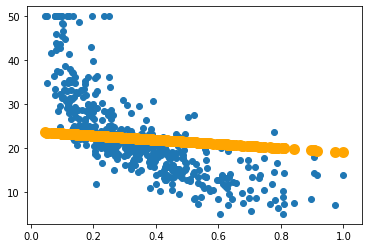

loss =  73.25793


In [33]:
from IPython.display import clear_output

for i in range(100):

    y_pred = w * x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data -= 0.05 * w.grad.data 
    b.data -= 0.05 * b.grad.data

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break


### Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросите в pytorch, нужно освоить три вещи: 

1. Как формировать батчи и пихать их в сетку
2. Как сделать сетку
3. Как написать цикл обучения

#### Как формировать батчи и пихать их в сетку

Чтобы в данном фреймворке иметь возможность итерироваться по данным и применять к ним преобразования, например, аугментации, о которых вы узнаете позже -- нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

Вот пример из документации:

```
class FaceLandmarksDataset(torch.utils.data.Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample
```

Как вы видите, у такого класса должно быть два метода: 

* `__len__` -- возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` -- возвращает семпл и таргет к нему


Теперь давайте напишем такой сами, в качестве датасета сгенерируем рандомные данные.

In [34]:
class RandomDataset(torch.utils.data.Dataset):
    """Our random dataset"""
    
    def __init__(self, x, y):
        self.x=x
        self.y=y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return {'sample': torch.tensor(x[idx, :], dtype=torch.float), 'target': y[idx]}

In [35]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [36]:
our_dataset = RandomDataset(x, y)

In [37]:
our_dataset.__getitem__(1)

{'sample': tensor([0.5374, 0.1586, 0.6953, 0.6693, 0.1141]),
 'target': 0.006510242556074575}

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [38]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [39]:
for batch in dataloader:
    batch_x = batch['sample']
    batch_y = batch['target']
    break
print('Sample:', batch_x)
print('Target:', batch_y)

Sample: tensor([[0.8467, 0.3480, 0.9126, 0.3493, 0.7006],
        [0.5374, 0.1586, 0.6953, 0.6693, 0.1141],
        [0.6818, 0.0018, 0.0508, 0.4507, 0.9260],
        [0.1584, 0.7959, 0.2857, 0.1718, 0.3745]])
Target: tensor([0.6446, 0.0065, 0.5657, 0.4120])


#### Как сделать сетку

Для того, чтобы в high-level pytorch создавать нейросети используется модуль `nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса должно быть метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [40]:
model = nn.Sequential() # создаем пустую модель, в которую будем добавлять слои
model.add_module('l1', nn.Linear(5, 3)) # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module('l2', nn.ReLU()) # добавили функцию активации
model.add_module('l3', nn.Linear(3, 1)) # добавили слой с 3-мя нейронами на вход и 5-ю на выход

In [41]:
y_pred = model(batch_x) # получили предсказания модели

#### Как написать цикл обучения
 
Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [42]:
mnist_train = torchvision.datasets.MNIST(
    './mnist/', train=True, download=True, 
    transform=torchvision.transforms.ToTensor()
) # используем готовый класс от торча для загрузки данных для тренировки
mnist_val = torchvision.datasets.MNIST(
    './mnist/', train=False, download=True,
    transform=torchvision.transforms.ToTensor()
) # используем готовый класс от торча для загрузки данных для валидации

train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=1
) # так как это уже унаследованный от Dataset класс, его можно сразу пихать в даталоадер

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, batch_size=4, shuffle=True, num_workers=1
) # так как это уже унаследованный от Dataset класс, его можно сразу пихать в даталоадер

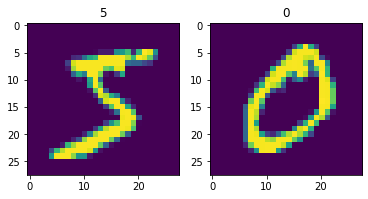

In [43]:
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [44]:
model = nn.Sequential(
    nn.Flatten(), # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(784, 128), # входной слой размером 784 нейронов с выходом в 128 нейронов
    nn.ReLU(), # функция активации релу
    nn.Linear(128, 10), # функция активации релу
    nn.Softmax(dim=-1) # софтмакс для получения вероятностного распределения над метками класса
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.05) # создаем оптимизатор и передаем туда параметры модели

Веса моделей хранятся в виде матриц и выглядят так:

In [45]:
[x for x in model.named_parameters()] 

[('1.weight',
  Parameter containing:
  tensor([[ 0.0231, -0.0253, -0.0007,  ..., -0.0213, -0.0297,  0.0098],
          [ 0.0206, -0.0061,  0.0207,  ..., -0.0295,  0.0225,  0.0224],
          [-0.0181, -0.0011, -0.0254,  ..., -0.0212, -0.0214, -0.0157],
          ...,
          [ 0.0055, -0.0200, -0.0323,  ...,  0.0065, -0.0093,  0.0230],
          [-0.0305,  0.0186,  0.0337,  ...,  0.0346, -0.0231, -0.0127],
          [ 0.0318, -0.0182,  0.0209,  ..., -0.0119, -0.0103,  0.0293]],
         requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([-3.1538e-02,  3.4246e-02,  2.5826e-02,  2.8292e-02,  3.2167e-02,
          -1.3932e-02,  3.6311e-04, -1.7393e-02,  3.5243e-02,  2.3900e-02,
           2.8054e-02, -3.1719e-02, -6.9183e-03,  3.4762e-02, -3.5046e-02,
           1.3059e-02, -2.3154e-02,  3.1446e-02,  1.6468e-02,  1.1923e-02,
          -1.1196e-02, -1.9673e-02, -5.1641e-03,  2.2530e-02, -3.1655e-02,
           3.1561e-02, -3.2051e-02, -1.5496e-02,  1.1386e-02, -8.4420e-0

In [46]:
epoch = 0
for epoch in range(0,11): # всего у нас будет 10 эпох (10 раз подряд пройдемся по всем батчам из трейна)
    for x_train, y_train in tqdm(train_dataloader): # берем батч из трейн лоадера
        y_pred = model(x_train) # делаем предсказания
        loss = nn.CrossEntropyLoss()(y_pred, y_train) # считаем лосс
        loss.backward() # считаем градиенты обратным проходом
        optimizer.step() # обновляем параметры сети
        optimizer.zero_grad() # обнуляем посчитанные градиенты параметров
    
    if epoch % 2 == 0:
        mean_val_loss = [] # сюда будем складывать средний лосс по батчам
        val_accuracy = []
        with torch.no_grad(): # мы считаем качество, поэтому мы запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(val_dataloader): # берем батч из вал лоадера
                y_pred = model(x_val) # делаем предсказания
                loss = nn.CrossEntropyLoss()(y_pred, y_val) # считаем лосс
                mean_val_loss.append(loss.numpy()) # добавляем в массив 
                val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
        print('Epoch: {epoch}, loss: {loss}, accuracy: {accuracy}'.format(
                epoch=epoch, loss=np.mean(mean_val_loss), accuracy=np.mean(val_accuracy)
        )) # выводим статистику
    


Epoch: 0, loss: 1.5399516820907593, accuracy: 0.9286



Epoch: 2, loss: 1.5124962329864502, accuracy: 0.9517



Epoch: 4, loss: 1.4977220296859741, accuracy: 0.967



Epoch: 6, loss: 1.4931172132492065, accuracy: 0.9703



Epoch: 8, loss: 1.4885624647140503, accuracy: 0.974



Epoch: 10, loss: 1.4888004064559937, accuracy: 0.9744


### Дополнительные материалы:

* [Хорошая книга про pytorch](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)